In [ ]:
! pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.4/251.4 kB 19.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
! pip install ucimlrepo


[notice] A new release of pip is available: 23.0.1 -> 24.1
[notice] To update, run: pip install --upgrade pip


# Project Personal Penambangan Data

## Klasifikasi Dataset "Rice"

Project ini bertujuan untuk mengklasifikasikan jenis beras dan akurasi berdasarkan data "Rice" yang didapatkan dari dataset yang diambil dari UCI Irvine Machine Learning.

# MEMAHAMI DATA

Di antara padi bersertifikat yang ditanam di TURKI, spesies Osmancik, yang memiliki areal tanam luas sejak tahun 1997 dan spesies Cammeo yang ditanam sejak tahun 2014, telah dipilih untuk penelitian ini. Jika dilihat ciri-ciri umum spesies Osmancik memiliki penampakan yang lebar, panjang, seperti kaca dan kusam. Jika dilihat ciri-ciri umum spesies Cammeo, mereka memiliki penampilan yang lebar dan panjang, seperti kaca dan kusam. Sebanyak 3.810 gambar butiran beras diambil untuk kedua spesies tersebut, diproses dan dibuat kesimpulan fitur. Diperoleh 7 ciri morfologi untuk setiap butir beras.

Data Rice adalah data yang memuat data beras yang memiliki 2 varietas, yaitu Osmancik dan Cammeo. Dataset ini memiliki 3.810 data dan memiliki 7 fitur. Dalam dataset ini, terdapat beberapa variabel yang memiliki peran yang berbeda dalam analisis:

- Area :  Fitur ini adalah fitur yang menyatakan jumlah piksel dalam batas butir beras.

- Perimeter : Fitur ini menyatakan keliling dengan menghitung jarak antar piksel di sekitar batas butiran beras.

- Major_Axis_Length : Fitur ini menyatakan garis terpanjang yang dapat digambar pada butiran beras, yaitu jarak sumbu utama.

- Minor_Axis_Length : Fitur ini menyatakan garis terpendek yang dapat digambar pada butiran beras, yaitu jarak sumbu kecil.

- Eccentricity : Fitur ini menyatakan pengukuran seberapa bulat elips, yang memiliki momen yang sama dengan butiran beras

- Convex_Area : Fitur ini menyatakan jumlah piksel cangkang cembung terkecil di wilayah yang dibentuk oleh butiran beras

- Extent : Fitur ini mengembalikan rasio wilayah yang dibentuk oleh butiran beras terhadap kotak pembatas	

- Class :  Ini adalah variabel target yang kategorikal, menunjukkan varietas beras, yaitu Osmancik dan Cammeo. Tidak ada nilai yang hilang(Tidak ada missing values).

https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik

In [ ]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 
  
# data (as pandas dataframes) 
X = rice_cammeo_and_osmancik.data.features 
y = rice_cammeo_and_osmancik.data.targets 
  
# metadata 
print(rice_cammeo_and_osmancik.metadata) 
  
# variable information 
print(rice_cammeo_and_osmancik.variables)

{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'published_in': 'International Journal of Intelligent Systems and App

In [ ]:
import pandas as pd
df = pd.read_csv('/work/Rice_dataset.csv')
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik


## 2.Eksplorasi Data

Eksplorasi data adalah tahap awal dalam analisis data yang bertujuan untuk memahami karakteristik, pola, dan sifat dasar dari dataset. Tujuan utama dari eksplorasi data adalah untuk mendapatkan wawasan yang berguna dari data yang tersedia sebelum melakukan analisis yang lebih mendalam atau membangun model.

Eksplorasi data secara manual melibatkan beberapa langkah penting

1. Jumlah (Count): Ini menunjukkan berapa banyak entri data yang ada untuk setiap variabel. Dalam kasus ini, Anda memiliki 900 entri untuk setiap variabel.

2. Rata-rata (Mean): Ini adalah nilai rata-rata dari seluruh data untuk setiap variabel. Rata-rata memberi Anda gambaran tentang nilai tengah dari distribusi data.

3. Standar Deviasi (Standard Deviation): Standar deviasi mengukur seberapa jauh titik data tersebar dari rata-rata. Semakin tinggi nilai standar deviasi, semakin besar variasi dalam data.

4. Minimum: Ini adalah nilai terkecil yang ada dalam dataset untuk setiap variabel. Ini memberi Anda gambaran tentang rentang nilai yang mungkin untuk setiap variabel.

5. Persentil ke-25 (Q1): Ini adalah nilai yang membagi 25% data terendah dari yang lainnya. Dalam konteks ini, 25% dari data memiliki nilai di bawah nilai ini.

6. Persentil ke-50 (Median atau Q2): Median adalah nilai tengah dari dataset saat diurutkan dari yang terkecil hingga yang terbesar. Dalam hal ini, 50% dari data memiliki nilai di bawah median.

7. Persentil ke-75 (Q3): Ini adalah nilai yang membagi 75% data terendah dari yang lainnya. Dalam konteks ini, 75% dari data memiliki nilai di bawah nilai ini.

8. Maksimum: Ini adalah nilai terbesar yang ada dalam dataset untuk setiap variabel. Ini memberi Anda gambaran tentang rentang nilai yang mungkin untuk setiap variabel.

### 3.Tipe data setiap kolom

| No. | Nama Kolom        | Nama Fitur       | Deskripsi                                                                                                   | Type         | Nilai            |
|-----|-------------------|------------------|-------------------------------------------------------------------------------------------------------------|--------------|------------------|
| 1   | Area              | Area             | Fitur ini adalah fitur yang menyatakan jumlah piksel dalam batas butir beras. Variabel ini adalah integer dan tidak memiliki nilai yang hilang.                                          | Integer      | Numerik          |
| 2   | MajorAxisLength   | MajorAxisLength  |  Fitur ini menyatakan garis terpanjang yang dapat digambar pada butiran beras, yaitu jarak sumbu utama. Tidak ada nilai yang hilang.                                  | Continuous         | Numerik          |
| 3   | MinorAxisLength   | MinorAxisLength  | Fitur ini menyatakan garis terpendek yang dapat digambar pada butiran beras, yaitu jarak sumbu kecil.. Tidak ada nilai yang hilang.                                    | Continuous        | Numerik          |
| 4   | Eccentricity      | Eccentricity     | Fitur ini menyatakan pengukuran seberapa bulat elips, yang memiliki momen yang sama dengan butiran beras. Tidak ada nilai yang hilang.                                    | Continuous      | Numerik          |
| 5   | ConvexArea        | ConvexArea       | Fitur ini menyatakan jumlah piksel cangkang cembung terkecil di wilayah yang dibentuk oleh butiran beras. Tidak ada nilai yang hilang.                                          | Integer      | Numerik          |
| 6   | Extent            | Extent           | Fitur ini mengembalikan rasio wilayah yang dibentuk oleh butiran beras terhadap kotak pembatas. Tidak ada nilai yang hilang.                             | Continuous     | Numerik          |
| 7   | Perimeter         | Perimeter        | Fitur kontinu yang memberikan rasio wilayah yang dibentuk oleh kismis terhadap total piksel dalam kotak pembatas. Tidak ada nilai yang hilang.                                | Continuous         | Numerik          |
| 8   | -                 | Class            | Osmancik and Cammeo                                                                                | Kategorikal  | Nominal          |


b. PERHITUNGAN MENGGUNAKAN PYTHON

In [ ]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144752,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


### 4.Identifikasi kualitas data

## A.Pengecekan Missing Value

In [ ]:
df.isnull()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
3805,False,False,False,False,False,False,False,False
3806,False,False,False,False,False,False,False,False
3807,False,False,False,False,False,False,False,False
3808,False,False,False,False,False,False,False,False


### Perhitungan LOF myenggunakan Phyton

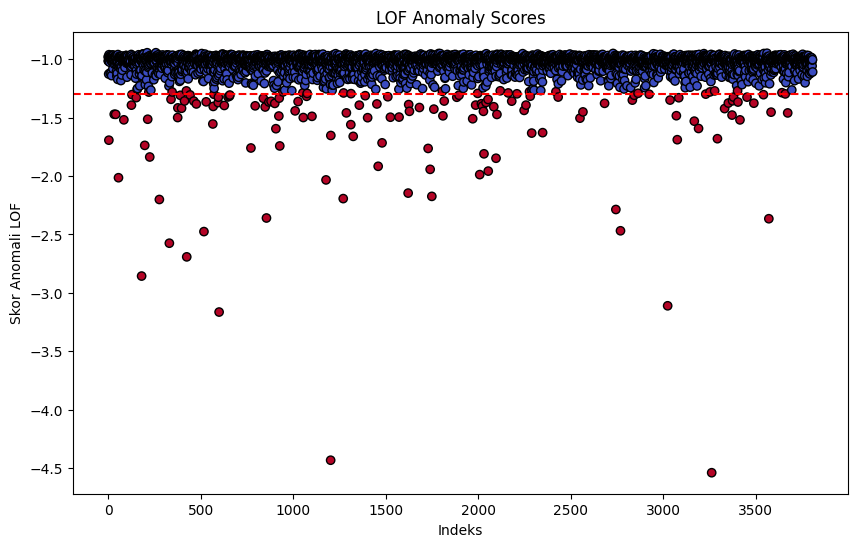

In [ ]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import numpy as np

# Baca dataset
df = pd.read_csv('/work/Rice_dataset.csv')

# Siapkan data untuk LOF (drop kolom 'Class' karena fitur kategorikal)
x = df.drop('Class', axis=1)

# Inisialisasi model LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.040)

# Terapkan LOF pada dataset
y_pred = lof.fit_predict(x) # fit_predict(x): Menerapkan model LOF pada dataset x dan mengembalikan prediksi. Hasil prediksi berupa label -1 untuk outlier dan 1 untuk inlier.
# Skor anomali (semakin rendah, semakin besar kemungkinan outlier)
anomaly_scores = lof.negative_outlier_factor_ # negative_outlier_factor_: Menghasilkan skor anomali untuk setiap sampel dalam dataset. Semakin rendah nilainya, semakin besar kemungkinan sampel tersebut adalah outlier.
# Tambahkan kolom hasil prediksi dan skor anomali ke dalam dataframe
df['LOF_Prediksi'] = y_pred # Menambahkan kolom LOF_Prediksi ke DataFrame df yang berisi hasil prediksi LOF (1 untuk inlier, -1 untuk outlier).
df['LOF_Skor_Anomali'] = anomaly_scores # Menambahkan kolom LOF_Skor_Anomali yang berisi skor anomali dari LOF.

# Visualisasi hasil (opsional)
plt.figure(figsize=(10, 6)) # Membuat figure baru dengan ukuran 10x6.
plt.title("LOF Anomaly Scores") # Memberi judul pada plot.
plt.scatter(np.arange(len(anomaly_scores)), anomaly_scores, c=(y_pred == -1), cmap='coolwarm', edgecolor='k') # Membuat scatter plot dari skor anomali.
plt.axhline(y=-1.3, color='r', linestyle='--')  # Menambahkan garis horizontal pada y = -1.3 untuk memisahkan outlier (opsional, dapat disesuaikan dengan konteks data).
plt.xlabel("Indeks")
plt.ylabel("Skor Anomali LOF")
plt.show()


In [ ]:
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class,LOF_Prediksi,LOF_Skor_Anomali
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo,1,-0.979824
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo,1,-1.015428
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo,1,-1.014332
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo,1,-1.126557
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo,-1,-1.692867
...,...,...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik,1,-0.988939
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik,1,-1.057611
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik,1,-1.006893
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik,1,-1.003781


# PREPROCESSING DATA

## 1.Penghapusan LOF

In [ ]:
# Hapus data yang terdeteksi sebagai outlier
df_cleaned = df[df['LOF_Prediksi'] != -1].reset_index(drop=True)  # memilih baris dengan prediksi LOF yang bukan -1 (outlier) dan mereset indeks
df_cleaned

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class,LOF_Prediksi,LOF_Skor_Anomali
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo,1,-0.979824
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo,1,-1.015428
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo,1,-1.014332
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo,1,-1.126557
4,13479,477.015991,200.053055,86.650291,0.901328,13786,0.657897,Cammeo,1,-0.961113
...,...,...,...,...,...,...,...,...,...,...
3652,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik,1,-0.988939
3653,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik,1,-1.057611
3654,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik,1,-1.006893
3655,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik,1,-1.003781


In [ ]:
df = df_cleaned.drop(columns=['LOF_Prediksi', 'LOF_Skor_Anomali'])
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,13479,477.015991,200.053055,86.650291,0.901328,13786,0.657897,Cammeo
...,...,...,...,...,...,...,...,...
3652,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3653,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3654,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3655,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik


## 2.Memisah antara fitur dan class

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Memisahkan Antara feature dan Class
x = df.drop(['Class'], axis=1)
y = df['Class']

print(f'X (berisi fitur) \n {x}')
print(f'Y (berisi Class) \n {y}')

x_std = x.to_numpy() 


X (berisi fitur) 
        Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     15231  525.578979         229.749878          85.093788      0.928882   
1     14656  494.311005         206.020065          91.730972      0.895405   
2     14634  501.122009         214.106781          87.768288      0.912118   
3     13176  458.342987         193.337387          87.448395      0.891861   
4     13479  477.015991         200.053055          86.650291      0.901328   
...     ...         ...                ...                ...           ...   
3652  11441  415.858002         170.486771          85.756592      0.864280   
3653  11625  421.390015         167.714798          89.462570      0.845850   
3654  12437  442.498993         183.572922          86.801979      0.881144   
3655   9882  392.296997         161.193985          78.210480      0.874406   
3656  11434  404.709992         161.079269          90.868195      0.825692   

      Convex_Area    Extent  
0 

## 3.Normalisasi Data

In [ ]:
import pickle
#mengubah fitur-fitur pada dataset sehingga nilainya berada dalam rentang [0, 1].
from sklearn.preprocessing import MinMaxScaler
filename = "my_preprocessingrice.pickle"

scaler = MinMaxScaler()
scaler.fit(x_std)
x = scaler.transform(x_std)

x = pd.DataFrame(x, columns=[['area','MajorAxisLength','MinorAxisLength','Eccentricity','ConvexArea','Extent','Perimeter']])


# save model
pickle.dump(scaler, open(filename, "wb"))
x

,area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,0.733493,0.872014,0.901216,0.487685,0.888011,0.748476,0.220549
1,0.667809,0.697008,0.648087,0.647745,0.691980,0.686950,0.344847
2,0.665296,0.735129,0.734349,0.552183,0.789846,0.673628,0.572233
3,0.498743,0.495696,0.512800,0.544468,0.671227,0.494581,0.418574
4,0.533356,0.600208,0.584436,0.525221,0.726665,0.541770,0.468912
...,...,...,...,...,...,...,...
3652,0.300548,0.257908,0.269049,0.503669,0.509725,0.298149,0.536450
3653,0.321567,0.288871,0.239480,0.593041,0.401801,0.329307,0.575213
3654,0.414325,0.407017,0.408641,0.528879,0.608474,0.412960,0.377871
3655,0.122458,0.126038,0.169922,0.321689,0.569017,0.125310,0.472320


# MODELLING DATA

## 1. Perhitungan Naive bayes

## a. Memecah antara data testing dan data training

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(x,y , 
                          random_state=0, 
                          train_size=0.8, shuffle=True)

print("X_train\n",X_train,"\n X_test\n", X_test,"\n y_train\n", y_train, "\n y_test\n",y_test)



X_train
           area MajorAxisLength MinorAxisLength Eccentricity ConvexArea  \
2244  0.335732        0.478424        0.504827     0.317601   0.802155   
3030  0.309002        0.311869        0.347436     0.437825   0.627099   
3500  0.169865        0.315915        0.370989     0.212887   0.791393   
728   0.475668        0.507304        0.491341     0.540545   0.659566   
3494  0.334019        0.351731        0.341911     0.511964   0.567786   
...        ...             ...             ...          ...        ...   
835   0.560772        0.656911        0.678432     0.468553   0.806312   
3264  0.662326        0.634602        0.594910     0.689460   0.633185   
1653  0.343614        0.358486        0.327475     0.528199   0.542943   
2607  0.512337        0.534819        0.449249     0.652035   0.551672   
2732  0.204935        0.220594        0.255016     0.375138   0.600372   

        Extent Perimeter  
2244  0.340257  0.319176  
3030  0.303116  0.906702  
3500  0.184466  0.196

### B.Convert Data

In [ ]:
df1 = pd.DataFrame(X_train)
df2 = pd.DataFrame(y_train) 
joined = df1.join(df2)
joined

df_X_train = pd.DataFrame(joined)
df_X_train.to_csv("TrainingData_rice.csv")

In [ ]:
df1 = pd.DataFrame(X_test)
df2 = pd.DataFrame(y_test) 
joined = df1.join(df2)
joined

df_X_test = pd.DataFrame(joined)
df_X_test.to_csv("TestData_rice.csv")

## C. Memeriksa hasil prediksi class antara data asli dan data testing

In [ ]:
# Prediksi kategori menggunakan naive baise
from sklearn.naive_bayes import GaussianNB
import pandas as pd 

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

df_pred = pd.DataFrame(y_pred, columns=["class predict"])
df_testing = pd.DataFrame(y_test)

df_testing = df_testing.reset_index()
df_testing = df_testing.drop(columns=['index'])
df_testing = df_testing.rename(columns={'Class': 'class testing'})

df_testing["class pred"] = df_pred
df_testing

,class testing,class pred
0,Osmancik,Cammeo
1,Osmancik,Osmancik
2,Cammeo,Cammeo
3,Osmancik,Osmancik
4,Osmancik,Osmancik
...,...,...
727,Cammeo,Cammeo
728,Cammeo,Cammeo
729,Cammeo,Cammeo
730,Osmancik,Osmancik


## d. Menghitung data akurasi dari data testing

AKURASI : 91.393 %

Confusion Matrix : 
 [[293  35]
 [ 28 376]]


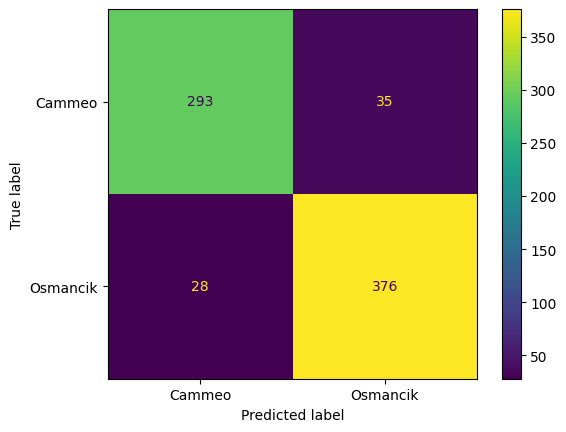

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
accuracy = accuracy * 100
c_matrix = confusion_matrix(y_test, y_pred, labels=clf.classes_)

print("AKURASI :",  "{:.3f}".format(accuracy),"%" "\n" )
print(f'Confusion Matrix : \n {c_matrix}')

disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=clf.classes_)
disp.plot()
plt.show()

## PERHITUNGAN MANUAL NAIVE BAYES MENGGUNAKAN EXCEL

## PERHITUNGAN NAIVE BAYES MENGGUNAKAN PYTHON

In [ ]:
sample = np.array([[0.37035445, 0.34154145, 0.21107995, 0.67864312, 0.47502234, 0.47428234, 0.61548421]])
sample_pred = clf.predict(sample)
sample_pred

array(['Osmancik'], dtype='<U8')

# ENSAMBLE LEARNING

In [ ]:
pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 63.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## STACKING CLASSIFIER

### PERHITUNGAN KNN data Training dengan k=3 dan k=5

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd 

clf_KNN3= KNeighborsClassifier(n_neighbors=3)
clf_KNN5 = KNeighborsClassifier(n_neighbors=5)
clf_KNN3.fit(X_train, y_train)
clf_KNN5.fit(X_train, y_train)


y_pred_KNN3 = clf_KNN3.predict(X_train)
y_pred_KNN5 = clf_KNN5.predict(X_train)

le = LabelEncoder()

df_pred_KNN3_enc = le.fit_transform(y_pred_KNN3)
df_pred_KNN5_enc = le.fit_transform(y_pred_KNN5)


df_pred_KNN3 = pd.DataFrame(df_pred_KNN3_enc, columns=["KNN3"])
df_pred_KNN5 = pd.DataFrame(df_pred_KNN5_enc, columns=["KNN5"])


df_train = pd.DataFrame(y_train)

y_train = y_train.reset_index()
y_train = y_train.drop(columns=['index'])
# print(y_train)


df_pred_combined= pd.concat([df_pred_KNN3, df_pred_KNN5, y_train], axis=1)
df_pred_combined



/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,KNN3,KNN5,Class
0,1,1,Osmancik
1,1,1,Osmancik
2,1,1,Osmancik
3,0,0,Cammeo
4,1,1,Osmancik
...,...,...,...
2920,0,0,Cammeo
2921,0,0,Osmancik
2922,1,1,Osmancik
2923,1,1,Osmancik


PERHITUNGAN Naive bayes Gaussian data Training untuk meta classifier

In [ ]:
x_train_meta = df_pred_combined.select_dtypes(include='number')
y_train_meta = df_pred_combined[df_pred_combined.columns[len(df_pred_combined.columns) - 1]]


In [ ]:
# Prediksi kategori menggunakan naive baise
from sklearn.naive_bayes import GaussianNB
import pandas as pd 

clf_meta = GaussianNB()
clf_meta.fit(x_train_meta, y_train_meta)
y_pred = clf_meta.predict(x_train_meta)

df_pred = pd.DataFrame(y_pred, columns=["class predict"])
df_testing = pd.DataFrame(y_train_meta)


df_testing = df_testing.reset_index()
df_testing = df_testing.drop(columns=['index'])
df_testing = df_testing.rename(columns={'Class': 'class asli'})

df_testing["class pred meta"] = df_pred
df_testing

,class asli,class pred meta
0,Osmancik,Osmancik
1,Osmancik,Osmancik
2,Osmancik,Osmancik
3,Cammeo,Cammeo
4,Osmancik,Osmancik
...,...,...
2920,Cammeo,Cammeo
2921,Osmancik,Cammeo
2922,Osmancik,Osmancik
2923,Osmancik,Osmancik


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_train_meta, y_pred)
accuracy = accuracy * 100
c_matrix = confusion_matrix(y_train_meta, y_pred, labels=clf.classes_)

print("AKURASI :",  "{:.3f}".format(accuracy),"%" "\n" )
print(f'Confusion Matrix : \n {c_matrix}')




AKURASI : 93.846 %

Confusion Matrix : 
 [[1151   71]
 [ 109 1594]]


### PERHITUNGAN KNN data Test dengan k=3 dan k=5

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd 

clf_KNN3= KNeighborsClassifier(n_neighbors=3)
clf_KNN5 = KNeighborsClassifier(n_neighbors=5)
clf_KNN3.fit(X_test, y_test)
clf_KNN5.fit(X_test, y_test)
# clf_GNB.fit(X_test, y_test)


y_pred_KNN3 = clf_KNN3.predict(X_test)
y_pred_KNN5 = clf_KNN5.predict(X_test)

le = LabelEncoder()
# Fit the encoder and transform the data
df_pred_KNN3_enc = le.fit_transform(y_pred_KNN3)
df_pred_KNN5_enc = le.fit_transform(y_pred_KNN5)
# Print the encoded data
# print(encoded_data)

df_pred_KNN3 = pd.DataFrame(df_pred_KNN3_enc, columns=["KNN3"])
df_pred_KNN5 = pd.DataFrame(df_pred_KNN5_enc, columns=["KNN5"])


df_test = pd.DataFrame(y_test)

# df_pred_combined = pd.concat([df_pred_KNN3, df_pred_KNN5], axis=1)
# df_pred_combined

# df_pred_combined.to_csv("data_combined.csv")
# print(df_pred_combined)

# y_test = y_test.reset_index()
# y_test = y_test.drop(columns=['index'])
# print(y_test)



df_pred_combined_test = pd.concat([df_pred_KNN3, df_pred_KNN5], axis=1)
df_pred_combined_test


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,KNN3,KNN5
0,0,0
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
727,0,0
728,0,0
729,0,0
730,1,1


PERHITUNGAN Naive bayes Gaussian data Test untuk meta classifier

In [ ]:
data = df_pred_combined_test
x_test_meta = data.select_dtypes(include='number')
y_test_meta = y_test

In [ ]:
# Prediksi kategori menggunakan naive baise
from sklearn.naive_bayes import GaussianNB
import pandas as pd 

y_pred = clf_meta.predict(x_test_meta)

df_pred = pd.DataFrame(y_pred, columns=["class predict"])
df_testing = pd.DataFrame(y_test_meta)


df_testing = df_testing.reset_index()
df_testing = df_testing.drop(columns=['index'])
df_testing = df_testing.rename(columns={'class': 'class testing'})

df_testing["class pred meta"] = df_pred
df_testing

,Class,class pred meta
0,Osmancik,Cammeo
1,Osmancik,Osmancik
2,Cammeo,Cammeo
3,Osmancik,Osmancik
4,Osmancik,Osmancik
...,...,...
727,Cammeo,Cammeo
728,Cammeo,Cammeo
729,Cammeo,Cammeo
730,Osmancik,Osmancik


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test_meta, y_pred)
accuracy = accuracy * 100
c_matrix = confusion_matrix(y_test_meta, y_pred, labels=clf.classes_)

print("AKURASI :",  "{:.3f}".format(accuracy),"%" "\n" )
print(f'Confusion Matrix : \n {c_matrix}')

AKURASI : 93.989 %

Confusion Matrix : 
 [[310  18]
 [ 26 378]]


PERHITUNGAN STACKING CLASSIFIER MENGGUNAKAN LIBRARY

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import warnings

warnings.simplefilter('ignore')
# Instantiate the encoder
le = LabelEncoder()
# Fit the encoder and transform the data
y_train = le.fit_transform(y_train)
# Print the encoded data
# print(encoded_data)

# print(X_train, y_train)

clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN ', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X_train, y_train, 
                                                cv=3, scoring='accuracy', error_score='raise')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
            % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.91 (+/- 0.00) [KNN ]
Accuracy: 0.92 (+/- 0.00) [Random Forest]
Accuracy: 0.92 (+/- 0.01) [Naive Bayes]
Accuracy: 0.91 (+/- 0.01) [StackingClassifier]


## BAGGING CLASSIFIER

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np


x = df.drop(['Class'], axis=1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x,y , 
                          random_state=0, 
                          train_size=0.8, shuffle=True)

# print("X_train\n",x_train,"\n X_test\n", x_test,"\n y_train\n", y_train, "\n y_test\n",y_test)


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test_enc = le.fit_transform(y_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import pickle



def bagging(x_train, y_train,x_test,y_test,jumlah_juri):
    accuracy = []
    for i in range(3,jumlah_juri + 1,1):
        clf = BaggingClassifier(base_estimator=GaussianNB(),n_estimators=i, random_state=0).fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        le = LabelEncoder()
        y_pred_enc = le.fit_transform(y_pred)
        acc = accuracy_score(y_test, y_pred_enc)
        accuracy.append(acc)
    return accuracy


jumlah_juri = 10
y = bagging(x_train,y_train,x_test,y_test_enc,jumlah_juri)  
# y   


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
[ 3  4  5  6  7  8  9 10]
[0.9043715846994536, 0.9043715846994536, 0.9043715846994536, 0.9043715846994536, 0.9043715846994536, 0.9043715846994536, 0.9057377049180327, 0.9043715846994536]


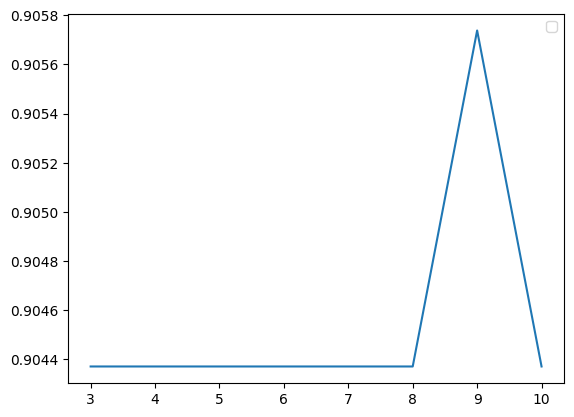

In [ ]:
import matplotlib.pyplot as plt

def make_plot_scatter(x:list, y:list, x_title:str, y_title:str, title:str):
    plt.plot(x, y)
    plt.legend()
    return plt.show()

x = np.arange(3,jumlah_juri + 1)
print(x)
print(y)
make_plot_scatter(x, y, 'index', 'acc', 'accuracy bagging')

In [ ]:
import pickle
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
filename = "baggingrice_model.pickle"
pra_proses = pickle.load(open('my_preprocessingrice.pickle', "rb"))

x_train = pra_proses.fit_transform(x_train)

clf_baik = BaggingClassifier(base_estimator=GaussianNB(),n_estimators=3, random_state=0).fit(x_train, y_train)
result = clf_baik.predict(x_test)
# save model
pickle.dump(clf_baik, open(filename, "wb"))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Membuat model sederhana
model = Sequential([
    Dense(10, activation='relu', input_shape=(784,)),
    Dense(10, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training model
# model.fit(X_train, y_train, epochs=5)

# Menyimpan model
model.save('/mnt/data/rice_model.h5')


2024-06-26 16:59:37.412549: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-26 16:59:37.644861: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-06-26 16:59:37.644905: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-06-26 16:59:37.683391: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-26 16:59:38.733923: W tensorflow/stream_executor/pla

## Implementasi pada website

Bisa meng akses link dibawah ini https://ricenew-jagz8qwgkghqbmycvxmqq7.streamlit.app/

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=06040306-8708-48f3-9c3c-52ad883cea73' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>